# Spotify top 50 

Utilizando o dataset de 50 músicas mais tocadas de 2019, o objetivo é **prever a popularidade da música através de modelos de machine learning**.


> Serão utilizadas as seguintes features: 


- **Danceability:** Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

- **Valence:** Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **Energy:** Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- **BPM:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

- **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

- **Speechiness:** This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

- **Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.


<center><img src="https://c.tenor.com/fJh-W38iA3oAAAAC/dance-kid.gif" width = 40%/></center>
<br><br>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving spotify.csv to spotify (3).csv


In [ ]:
df = pd.read_csv('spotify.csv', encoding='latin-1')

In [ ]:
df.shape

(50, 14)

In [ ]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50 non-null     int64 
 1   Track.Name      50 non-null     object
 2   Artist.Name     50 non-null     object
 3   Genre           50 non-null     object
 4   BPM             50 non-null     int64 
 5   Energy          50 non-null     int64 
 6   Danceability    50 non-null     int64 
 7   Loudness        50 non-null     int64 
 8   Liveness        50 non-null     int64 
 9   Valence.        50 non-null     int64 
 10  Length.         50 non-null     int64 
 11  Acousticness..  50 non-null     int64 
 12  Speechiness.    50 non-null     int64 
 13  Popularity      50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50.0,25.50,14.577380,1.0,13.25,25.5,37.75,50.0
BPM,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0


In [ ]:
# Verificando valores faltantes
df.isnull().sum()

Track.Name        0
Artist.Name       0
Genre             0
BPM               0
Energy            0
Danceability      0
Loudness          0
Liveness          0
Valence.          0
Length.           0
Acousticness..    0
Speechiness.      0
Popularity        0
dtype: int64

In [ ]:
# Quais são os tipos e quantas músicas em cada gênero?

print(type(df['Genre']))
popular_genre=df.groupby('Genre').size().unique
print(popular_genre)
genre_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


In [102]:
#Calculando o número de músicas no top 50 por artista

print(df.groupby('Artist.Name').size())


Artist.Name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


Ed Sheeran se destaca com 4 músicas no top 50.
Em seguida, com 2 músicas cada, Shawn Mendes, Ariana Grande, Post Malone, Lil Nas X, Billie Eillish, Sech, J Balvin, Chainsmokers e Marshmello.

In [ ]:
df.drop(['Track.Name'], axis=1)


,Artist.Name,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


# Gráficos

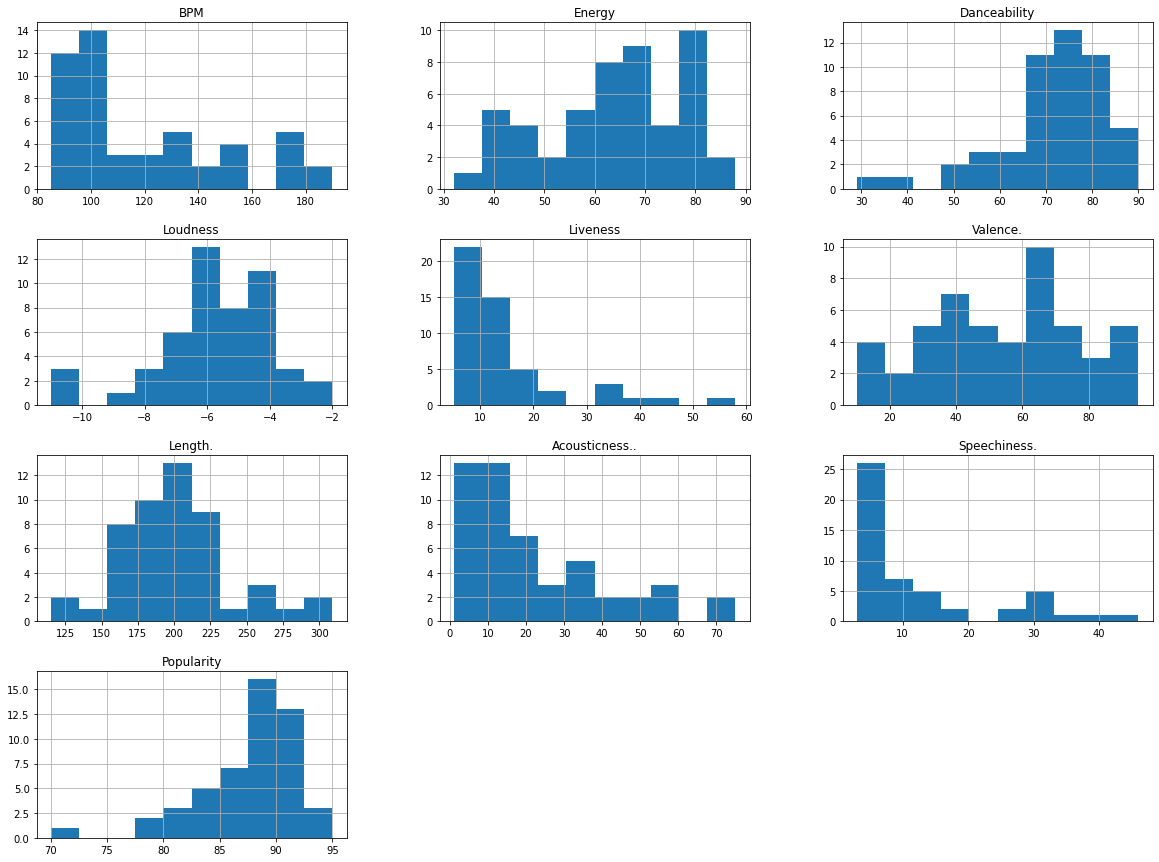

In [ ]:
df.hist(figsize=(20,15));

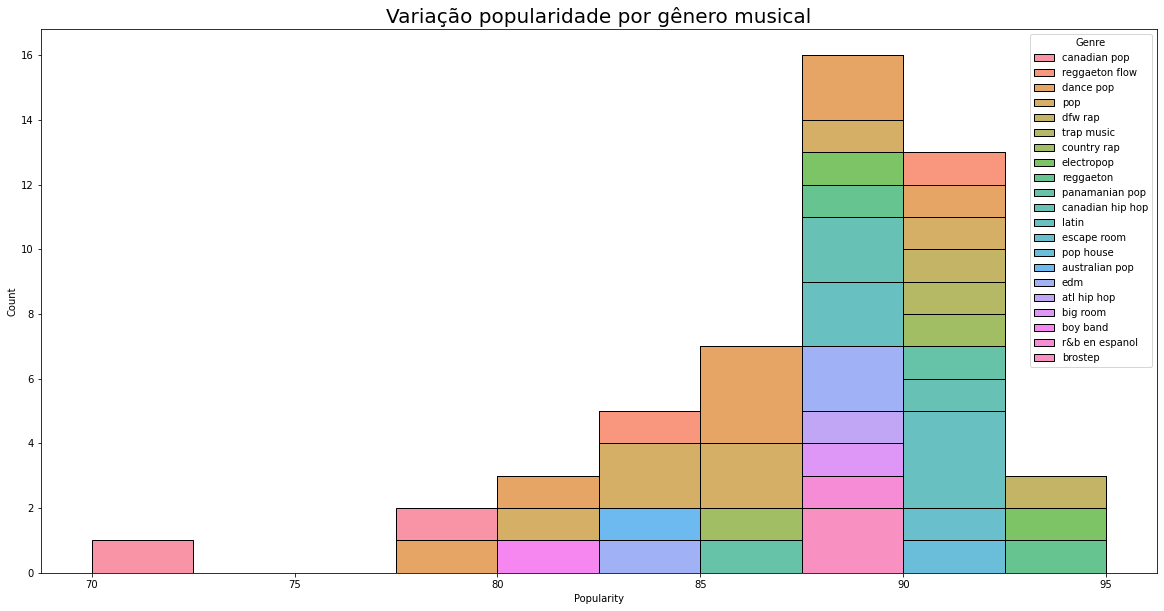

In [ ]:
# Variação de popularidade por gênero musical
plt.figure(figsize=(20,10))
plt.title('Variação popularidade por gênero musical', fontsize=20)
sns.histplot(data=df, x="Popularity", hue="Genre", multiple="stack")

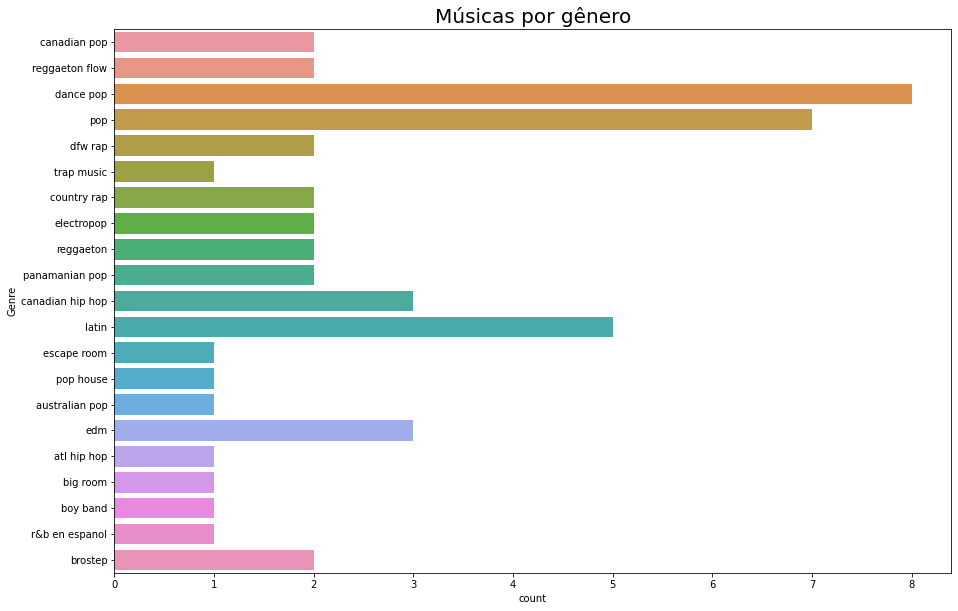

In [ ]:
# Número de músicas por gênero
fig = plt.figure(figsize=(15,10))
plt.title('Músicas por gênero',fontsize=20)
sns.countplot(y='Genre', data=df,)

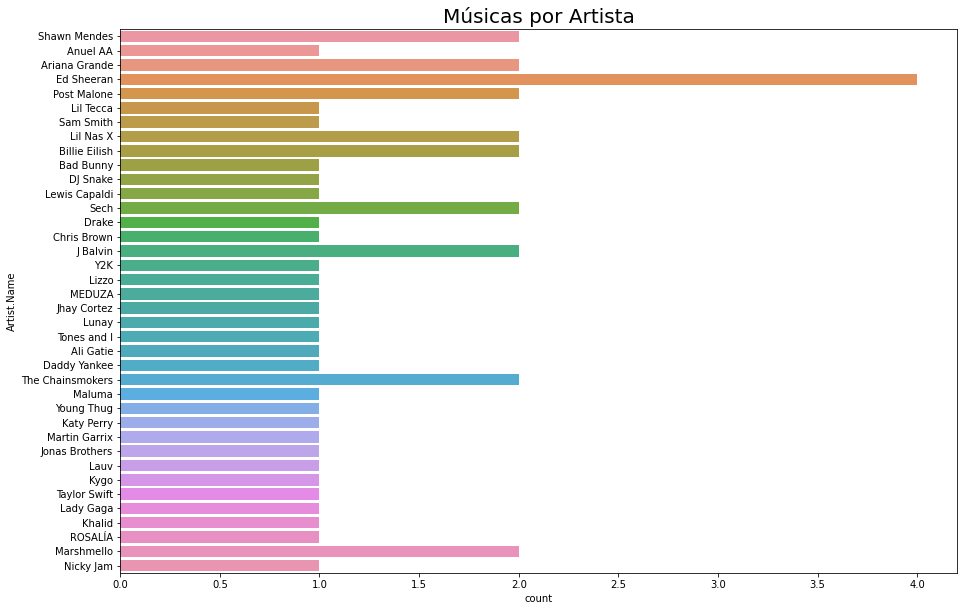

In [112]:
# Número de músicas por artista
fig = plt.figure(figsize=(15,10))
plt.title('Músicas por Artista',fontsize=20)
sns.countplot(y='Artist.Name', data=df)


É possível resumir os 21 gêneros diferentes em:
- **pop** ( canadian pop, dance pop, pop, australian pop, boy band, pamanian pop, pop house )
- **hip hop** ( atl hip hop, canadian hip hop)
- **reggaeton** (latin, r&b en espanol, reggaeton flow,reggaeton)
- **rap** ( trap music, dfw rap,country rap )
- **eletronic** (brostep, electropop, edm, big room, escape room )



In [163]:
# Deixando Gênero musical mais enxuto com 5 categorias: pop, hip hop, reggaeton, rap e eletronic

genre_categories = np.where(df['Genre'].isin(['canadian pop', 'dance pop', 'pop', 'australian pop', 'boy band', 'panamanian pop', 'pop house']),'pop',
      np.where(df['Genre'].isin(['atl hip hop', 'canadian hip hop']),'hip hop',
      np.where(df['Genre'].isin(['latin', 'r&b en espanol', 'reggaeton flow','reggaeton']),'reggaeton',
      np.where(df['Genre'].isin(['trap music', 'dfw rap','country rap']), 'rap', 
      np.where(df['Genre'].isin(['brostep', 'electropop', 'edm', 'big room', 'escape room']), 'eletronic', 'não citado')))))


In [164]:
print(genre_categories)

['pop' 'reggaeton' 'pop' 'pop' 'rap' 'pop' 'rap' 'pop' 'rap' 'eletronic'
 'reggaeton' 'pop' 'pop' 'pop' 'hip hop' 'pop' 'reggaeton' 'rap' 'hip hop'
 'eletronic' 'pop' 'rap' 'reggaeton' 'reggaeton' 'eletronic' 'pop' 'pop'
 'hip hop' 'reggaeton' 'reggaeton' 'eletronic' 'pop' 'reggaeton' 'hip hop'
 'pop' 'eletronic' 'pop' 'pop' 'pop' 'pop' 'eletronic' 'pop' 'pop' 'pop'
 'reggaeton' 'eletronic' 'reggaeton' 'eletronic' 'eletronic' 'pop']


In [165]:
df['genre_categories'] = genre_categories

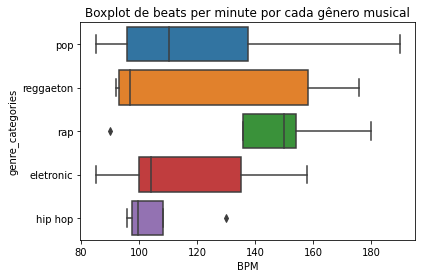

In [166]:
# Gênero por BPM
sns.boxplot(data=df, x='BPM', y='genre_categories')

plt.title('Boxplot de beats per minute por cada gênero musical')
plt.show()

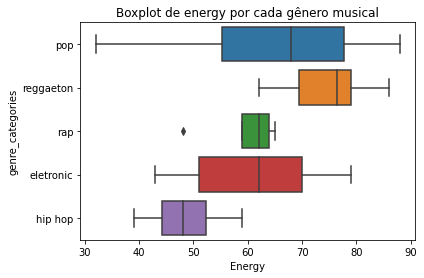

In [167]:
# Gênero por Energy
sns.boxplot(data=df, x='Energy', y='genre_categories')

plt.title('Boxplot de energy por cada gênero musical')
plt.show()

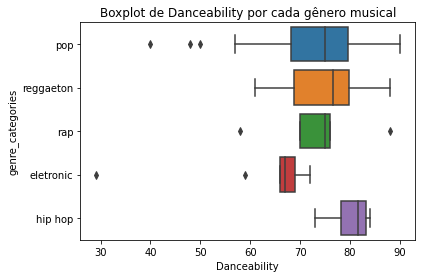

In [168]:
# Gênero por Danceability
sns.boxplot(data=df, x='Danceability', y='genre_categories')

plt.title('Boxplot de Danceability por cada gênero musical')
plt.show()

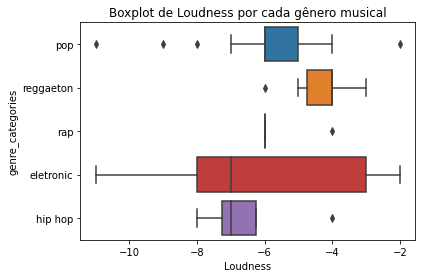

In [169]:
# Gênero por Loudness
sns.boxplot(data=df, x='Loudness', y='genre_categories')

plt.title('Boxplot de Loudness por cada gênero musical')
plt.show()

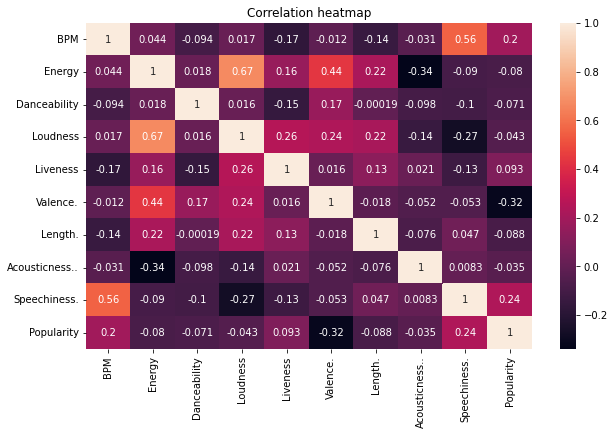

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation heatmap')
plt.show()    

# Preparando os dados para os modelos de Machine Learning

- Dados nomeados: Artistas, Músicas e Gêneros
- Colunas: BPM, Energy, Danceability, Loudness, Liveness, Valence, Lenght, Acousticness, Speechiness
- Target: Popularity

In [170]:
# Importando ferramentas

from sklearn.model_selection import train_test_split

In [171]:
#Separação de features e target
X = df.drop(columns='Popularity')
y = df['Popularity']

In [172]:
#Separando em traino, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.3,
                                                    random_state=42)

In [173]:
#Utilizando o Cross Validation
from sklearn.model_selection import KFold, cross_val_score

#Instanciando a validação cruzada
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [174]:
#Importando as bibliotecas para as métricas
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score


# Regressão Logística

In [175]:
#Importando a biblioteca de Regressão Logística
from sklearn.linear_model import LogisticRegression

In [178]:
#Instanciando o modelo
model_logistic = LogisticRegression(max_iter=1000)

#Rodando o modelo
val_score_logistic = cross_val_score(model_logistic, 
                            X, y, 
                            scoring='accuracy', 
                            cv=cv)

print(val_score_logistic)

[nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/loc

# Árvore de Decisão

In [179]:
#Importando a biblioteca da Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [180]:
#Instanciando o modelo
model_tree = DecisionTreeClassifier(max_depth = 5, random_state = 42)

#Rodando o modelo
val_score_tree = cross_val_score(model_tree, 
                            X_train, y_train, 
                            scoring='accuracy', 
                            cv=cv)

val_score_tree.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-package

nan

# Naive Bayes

In [181]:
#Importando a biblioteca de Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [182]:
#Instanciando o modelo
model_bayes = GaussianNB()

#Rodando o modelo
val_score_bayes = cross_val_score(model_bayes, 
                            X_train, y_train, 
                            scoring='accuracy', 
                            cv=cv)

val_score_bayes.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 246, in fit
    X, y, np.unique(y), _refit=True, sample_weight=sample_weight
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 402, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
  File "/usr/l

nan

# KNN

In [ ]:
#Importando a biblioteca de K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instanciando o modelo
model_knn = KNeighborsClassifier(n_neighbors=5, n_jobs = 2)

#Rodando o modelo
val_score_KNN = cross_val_score(model_knn, 
                            X_train, y_train, 
                            scoring='accuracy', 
                            cv=cv)

val_score_KNN.mean()

# Random Forest

In [ ]:
#Importando a biblioteca de Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Instanciando o modelo
model_forest = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features="sqrt", max_samples=0.7)

#Rodando o modelo
val_score_forest = cross_val_score(model_forest, 
                            X_train, y_train, 
                            scoring='accuracy', 
                            cv=cv)

val_score_forest.mean()

# Considerações e Insights

- Pensei em segmentar as caracteristicas para observar quantos clusters definir e reduzir para menos grupos por características comuns com elbow method) 
- As características das músicas mais populares são: 
- Os artistas com mais de uma música no top 50 são do gênero musical pop